# Analysis Data Kamus Alay dan Abusive

# Import Library

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import statistics as stat
import csv
import re


# Data Preparation

## Load Data

Load data **`database tweet konten`** with column **text** and **label** data yang sudah di bersihkan

In [385]:
connection = sqlite3.connect('database/dbtweet.db')
sql = connection.cursor()

db_tweet_content = "SELECT * FROM tweet_content"
df = pd.read_sql_query(db_tweet_content, connection)
df

# df = pd.read_csv('csv/data.csv', encoding='latin-1')
# df

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Kalimat_Alay,Kalimat_Abusive
0,750635,- di saat semua cowok berusaha melacak perhati...,1,1,1,0,0,0,0,0,1,1,0,0,"disaat,loe,yg,elo,elo",bego
1,750636,rt pengguna: pengguna siapa yang telat memberi...,0,1,0,0,0,0,0,0,0,0,0,0,"user,user,ngasih,elu,noh","edan,sarap"
2,750637,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,"berfikir,ninggalkan,orangtuaku",
3,750638,pengguna pengguna aku itu aku\dan\ku tau matam...,0,0,0,0,0,0,0,0,0,0,0,0,"user,user,n,nku,diliat",sipit
4,750639,pengguna pengguna kaum sudah kelihatan nya dar...,1,1,0,1,1,0,0,0,0,0,1,0,"user,user,kapir,udah,keliatan,dongok,hahahah","cebong,kafir,dongok,dungu"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,763799,pengguna jangan asal berbicara ndasmu kamu yan...,1,1,1,0,0,0,1,0,0,1,0,0,"user,ngomong,lu,yg,sekate2,anjyng","congor,anjing"
13165,763800,pengguna kasur mana enak,0,1,0,0,0,0,0,0,0,0,0,0,user,kunyuk
13166,763801,pengguna hati hati :( tidak\dan\lagi bosan duh...,0,0,0,0,0,0,0,0,0,0,0,0,"user,g,n,nlagi,huft",bisu
13167,763802,pengguna pengguna pengguna pengguna bom yang r...,0,0,0,0,0,0,0,0,0,0,0,0,"user,user,user,user",


In [293]:
# 1. jumlah data yang pakai (13.169)
# 2. datanya darimana (twitter/kaggle)
# 3. jumlah labelnya (14: id,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong)
# 4. rentang waktu pengambilan data ()

In [195]:
def clean_text(text):
    text = text.replace(",","")
    return text

In [194]:
df['length_of_tweet'] = df['tweet'].apply(lambda x: len(x))

In [193]:
def normalize_column(values):
    min_values = min(values)
    max_values = max(values)
    
    new_values = []
    for value in values:
        new_value = (value - min_values) / (max_values - min_values)
        new_values.append(new_value)
    return new_values

In [ ]:
df['normalized_length_of_tweet']

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [196]:
# 5 teratas
df.head()

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Kalimat_Alay,Kalimat_Abusive,length_of_tweet
0,750635,- di saat semua cowok berusaha melacak perhati...,1,1,1,0,0,0,0,0,1,1,0,0,"disaat,loe,yg,elo,elo",bego,133
1,750636,rt pengguna: pengguna siapa yang telat memberi...,0,1,0,0,0,0,0,0,0,0,0,0,"user,user,ngasih,elu,noh","edan,sarap",119
2,750637,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,"berfikir,ninggalkan,orangtuaku",,251
3,750638,pengguna pengguna aku itu aku\dan\ku tau matam...,0,0,0,0,0,0,0,0,0,0,0,0,"user,user,n,nku,diliat",sipit,78
4,750639,pengguna pengguna kaum sudah kelihatan nya dar...,1,1,0,1,1,0,0,0,0,0,1,0,"user,user,kapir,udah,keliatan,dongok,hahahah","cebong,kafir,dongok,dungu",69


In [197]:
# 5 terbawah
df.tail()

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Kalimat_Alay,Kalimat_Abusive,length_of_tweet
13164,763799,pengguna jangan asal berbicara ndasmu kamu yan...,1,1,1,0,0,0,1,0,0,1,0,0,"user,ngomong,lu,yg,sekate2,anjyng","congor,anjing",60
13165,763800,pengguna kasur mana enak,0,1,0,0,0,0,0,0,0,0,0,0,user,kunyuk,25
13166,763801,pengguna hati hati :( tidak\dan\lagi bosan duh...,0,0,0,0,0,0,0,0,0,0,0,0,"user,g,n,nlagi,huft",bisu,63
13167,763802,pengguna pengguna pengguna pengguna bom yang r...,0,0,0,0,0,0,0,0,0,0,0,0,"user,user,user,user",,150
13168,763803,pengguna mana situ memberi(: itu cuma foto ya ...,1,1,1,0,0,0,0,0,1,1,0,0,"user,ngasih",onta,52


## Cek jumlah kolom dan total data

Data yang diolah memiliki 15 kolom dan total data 13169

In [198]:
df.shape

(13169, 17)

## Cek total duplikat data

Total data yang duplikat sejumlah 0

In [199]:
df.loc[df.duplicated(keep=False)].sort_values('tweet')

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Kalimat_Alay,Kalimat_Abusive,length_of_tweet


Menghilangkan data yang duplikat

In [110]:
df.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [200]:
df.isna().sum()

id                 0
tweet              0
HS                 0
Abusive            0
HS_Individual      0
HS_Group           0
HS_Religion        0
HS_Race            0
HS_Physical        0
HS_Gender          0
HS_Other           0
HS_Weak            0
HS_Moderate        0
HS_Strong          0
Kalimat_Alay       0
Kalimat_Abusive    0
length_of_tweet    0
dtype: int64

Jalankan perintah untuk melihat persentase missing values dari setiap kolom. 

Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [201]:
df.isna().sum()

id                 0
tweet              0
HS                 0
Abusive            0
HS_Individual      0
HS_Group           0
HS_Religion        0
HS_Race            0
HS_Physical        0
HS_Gender          0
HS_Other           0
HS_Weak            0
HS_Moderate        0
HS_Strong          0
Kalimat_Alay       0
Kalimat_Abusive    0
length_of_tweet    0
dtype: int64

Cek kondisi data terakhir

## Perkecil semua kolom tweet

In [202]:

df["tweet"] = df["tweet"].str.lower()


In [203]:
df

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Kalimat_Alay,Kalimat_Abusive,length_of_tweet
0,750635,- di saat semua cowok berusaha melacak perhati...,1,1,1,0,0,0,0,0,1,1,0,0,"disaat,loe,yg,elo,elo",bego,133
1,750636,rt pengguna: pengguna siapa yang telat memberi...,0,1,0,0,0,0,0,0,0,0,0,0,"user,user,ngasih,elu,noh","edan,sarap",119
2,750637,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,"berfikir,ninggalkan,orangtuaku",,251
3,750638,pengguna pengguna aku itu aku\dan\ku tau matam...,0,0,0,0,0,0,0,0,0,0,0,0,"user,user,n,nku,diliat",sipit,78
4,750639,pengguna pengguna kaum sudah kelihatan nya dar...,1,1,0,1,1,0,0,0,0,0,1,0,"user,user,kapir,udah,keliatan,dongok,hahahah","cebong,kafir,dongok,dungu",69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,763799,pengguna jangan asal berbicara ndasmu kamu yan...,1,1,1,0,0,0,1,0,0,1,0,0,"user,ngomong,lu,yg,sekate2,anjyng","congor,anjing",60
13165,763800,pengguna kasur mana enak,0,1,0,0,0,0,0,0,0,0,0,0,user,kunyuk,25
13166,763801,pengguna hati hati :( tidak\dan\lagi bosan duh...,0,0,0,0,0,0,0,0,0,0,0,0,"user,g,n,nlagi,huft",bisu,63
13167,763802,pengguna pengguna pengguna pengguna bom yang r...,0,0,0,0,0,0,0,0,0,0,0,0,"user,user,user,user",,150


In [ ]:
# 1. Sentiment apa yang paling banyak (proporsi labels)
# 2. jumlah kata per row
# 3. Untuk masing masing label, 10 Kata apa yang paling sering muncul.
# 4. Apakah ada tweet yang duplicated, tapi beda label.

## Buat kolom baru 

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_word" yang berisi masing-masing panjang kata dari setiap teks.

In [204]:
df['total_word'] = df['tweet'].apply(lambda sent: len(sent.split()))

In [205]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub("'", "", x))

In [206]:
kata_abusive={}
kamus_abusive = pd.read_csv("csv/abusive.csv")
kata_abusive = kamus_abusive["ABUSIVE"] # ambil field abusive
kata_abusive = {fruit : fruit for fruit in kata_abusive}
kata_abusive

{'alay': 'alay',
 'ampas': 'ampas',
 'buta': 'buta',
 'keparat': 'keparat',
 'anjing': 'anjing',
 'anjir': 'anjir',
 'babi': 'babi',
 'bacot': 'bacot',
 'bajingan': 'bajingan',
 'banci': 'banci',
 'bandot': 'bandot',
 'buaya': 'buaya',
 'bangkai': 'bangkai',
 'bangsat': 'bangsat',
 'bego': 'bego',
 'bejat': 'bejat',
 'bencong': 'bencong',
 'berak': 'berak',
 'bisu': 'bisu',
 'celeng': 'celeng',
 'jancuk': 'jancuk',
 'bodoh': 'bodoh',
 'berengsek': 'berengsek',
 'budek': 'budek',
 'burik': 'burik',
 'jamban': 'jamban',
 'cocot': 'cocot',
 'congor': 'congor',
 'culun': 'culun',
 'cupu': 'cupu',
 'dongok': 'dongok',
 'dungu': 'dungu',
 'edan': 'edan',
 'tai': 'tai',
 'ngewe': 'ngewe',
 'geblek': 'geblek',
 'gembel': 'gembel',
 'gila': 'gila',
 'goblok': 'goblok',
 'iblis': 'iblis',
 'idiot': 'idiot',
 'jablay': 'jablay',
 'jembud': 'jembud',
 'jembut': 'jembut',
 'jijik': 'jijik',
 'kacrut': 'kacrut',
 'kafir': 'kafir',
 'modar': 'modar',
 'kampang': 'kampang',
 'kampret': 'kampret',
 'ka

In [208]:
my_dictalay = {}
with open('csv/new_kamusalay.csv', 'r') as file_kamus_alay:
 reader = csv.reader(file_kamus_alay)
 for row in reader:
     key = row[0]
     value = row[1]
     my_dictalay[key] = value

kata_alay = {key.replace(',', '='): value.replace(',', ':') for key, value in my_dictalay.items()}
kata_alay


{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakw

In [119]:
def find_alay(header):
    alay_words = []
    for word in header.split():
        if word in kata_alay:
            header = header.replace(word, kata_alay[word])
            alay_words.append(word)
    return ' '.join(alay_words)


In [120]:
def find_abusive(header):
    abusive_words = []
    for word in header.split():
        if word in kata_abusive:
            header = header.replace(word, kata_abusive[word])
            abusive_words.append(word)
    return ' '.join(abusive_words)




In [121]:
def panjang(header):
    if header:
        return len(header.replace(",", ""))
    else:
        return 0

In [480]:
def panjang_list(header):
    if header:
        my_list = header.split(",")
        length = len(my_list)
        return length
    else:
        return 0

In [165]:
def lebeling(total_ka, total_a):
    if total_ka == 0 and total_a == 0:
        return 'Netral'
    elif total_ka > 0 and total_a > 0:
        return 'Annoying'
    elif total_ka > 0 and total_a == 0:
        return 'Abusive'
    elif total_ka == 0 and total_a > 0:
        return 'Alay'

Membuat Field baru Kalimat_Alay untuk menampung kata alay yang keluar di field tweet

In [425]:
df['Total_KA'] = df['Kalimat_Abusive'].apply(panjang)

Membuat Field baru Total_A untuk menampung jumlah kalimat alay

In [426]:
df['Total_A'] = df['Kalimat_Alay'].apply(panjang)

Membuat Field baru Total_Char untuk menampung jumlah karakter field tweet

In [427]:
df['total_char'] = df['tweet'].apply(len)

Membuat Field baru Total_Word untuk menampung jumlah kalimat field tweet

In [428]:
df['total_word'] = df['tweet'].apply(lambda sent: len(sent.split()))

Membuat Field baru Type untuk menampung type kalimat dari tweet tersebut
- Netral = jika tweet tersebut tidak mengandukng kata alay ataupun kata abusive
- Alay = jika tweet tersebut mengandung kata alay saja
- Abusive = jika tweet tersebut mengandung kalimat abusive saja
- Anoying = jika tweet tersebut mengandung kata abusive dan alay

In [429]:
df['Type'] = df.apply(lambda x: lebeling(x['Total_KA'], x['Total_A']), axis=1)

In [482]:
df['Total_Kalimat_Abusive'] = df['Kalimat_Abusive'].apply(panjang_list)

In [481]:
df['Total_Kalimat_Alay'] = df['Kalimat_Alay'].apply(panjang_list)

Check data yang sudah di tambahkan field baru

In [483]:
# Cek data teratas
df
# df.to_csv('dataxxxx.csv', index=False)

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Strong,Kalimat_Alay,Kalimat_Abusive,Total_KA,Total_A,total_char,total_word,Type,Total_Kalimat_Abusive,Total_Kalimat_Alay
0,750635,- di saat semua cowok berusaha melacak perhati...,1,1,1,0,0,0,0,0,...,0,"disaat,loe,yg,elo,elo",bego,4,17,133,22,Annoying,1,5
1,750636,rt pengguna: pengguna siapa yang telat memberi...,0,1,0,0,0,0,0,0,...,0,"user,user,ngasih,elu,noh","edan,sarap",9,20,119,20,Annoying,2,5
2,750637,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,...,0,"berfikir,ninggalkan,orangtuaku",,0,28,251,38,Alay,0,3
3,750638,pengguna pengguna aku itu aku\dan\ku tau matam...,0,0,0,0,0,0,0,0,...,0,"user,user,n,nku,diliat",sipit,5,18,78,13,Annoying,1,5
4,750639,pengguna pengguna kaum sudah kelihatan nya dar...,1,1,0,1,1,0,0,0,...,0,"user,user,kapir,udah,keliatan,dongok,hahahah","cebong,kafir,dongok,dungu",22,38,69,11,Annoying,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,763799,pengguna jangan asal berbicara ndasmu kamu yan...,1,1,1,0,0,0,1,0,...,0,"user,ngomong,lu,yg,sekate2,anjyng","congor,anjing",12,28,60,9,Annoying,2,6
13165,763800,pengguna kasur mana enak,0,1,0,0,0,0,0,0,...,0,user,kunyuk,6,4,25,4,Annoying,1,1
13166,763801,pengguna hati hati :( tidak\dan\lagi bosan duh...,0,0,0,0,0,0,0,0,...,0,"user,g,n,nlagi,huft",bisu,4,15,63,8,Annoying,1,5
13167,763802,pengguna pengguna pengguna pengguna bom yang r...,0,0,0,0,0,0,0,0,...,0,"user,user,user,user",,0,16,150,22,Alay,0,4


In [431]:
splited_tweet = df['tweet'].apply(lambda sent: sent.split())

In [432]:
splited_tweet

0        [-, di, saat, semua, cowok, berusaha, melacak,...
1        [rt, pengguna:, pengguna, siapa, yang, telat, ...
2        [41, kadang, aku, berpikir, kenapa, aku, tetap...
3        [pengguna, pengguna, aku, itu, aku\dan\ku, tau...
4        [pengguna, pengguna, kaum, sudah, kelihatan, n...
                               ...                        
13164    [pengguna, jangan, asal, berbicara, ndasmu, ka...
13165                        [pengguna, kasur, mana, enak]
13166    [pengguna, hati, hati, :(, tidak\dan\lagi, bos...
13167    [pengguna, pengguna, pengguna, pengguna, bom, ...
13168    [pengguna, mana, situ, memberi(:, itu, cuma, f...
Name: tweet, Length: 13169, dtype: object

In [433]:
netral_words = {}
anoying_words = {}
toxic_words = {}
alay_words = {}

for lab, twe in zip(df['Type'], splited_tweet):
    if lab == 'Netral':
        for word in twe:
            try:
                netral_words[word] += 1
            except KeyError:
                netral_words[word] = 1
    if lab == 'Annoying':
        for word in twe:
            try:
                anoying_words[word] += 1
            except KeyError:
                anoying_words[word] = 1
    if lab == 'Toxic':
        for word in twe:
            try:
                toxic_words[word] += 1
            except KeyError:
                toxic_words[word] = 1
    if lab == 'Alay':
        for word in twe:
            try:
                alay_words[word] += 1
            except KeyError:
                alay_words[word] = 1

In [434]:
kamus_negative = ['sombong']
kamus_positive = []

In [ ]:
contoh_text = df.loc[df.label == 'negative'].iloc[0].values

In [ ]:
score = 0
for word in contoh_text[0].split():
    if word in kamus_negative:
        score = score-1
    elif word in kamus_positive:
        score = score+1
    else:
        score = score+0
    

In [643]:
sorted(positive_words.items(), key = lambda x:x[1], reverse=True)[:10]

[]

In [ ]:
sorted(negative_words.items(), key = lambda x:x[1], reverse=True)[:10]

In [ ]:
sorted(neutral_words.items(), key = lambda x:x[1], reverse=True)[:10]

In [412]:
import numpy as np
import seaborn as sns

In [ ]:
np.quantile(df['total_char'], 0.01)

In [ ]:
df.loc[df.total_char<449].mean()

In [435]:
df.describe()

,id,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_KA,Total_A,total_char,total_word
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,757219.000000,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,5.382489,22.882527,122.031058,17.696408
std,3801.707182,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,6.040394,19.673970,74.834867,10.828359
min,750635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,753927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,9.000000
50%,757219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,18.000000,108.000000,16.000000
75%,760511.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.000000,31.000000,168.000000,24.000000
max,763803.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,113.000000,195.000000,570.000000,65.000000


In [ ]:
sns.distplot(df.total_word)

In [59]:
df['splitted_tweet'] = [tweet.split(" ") for tweet in df['tweet']]

In [60]:
count_of_words = {}
for splitted_tweet in df['splitted_tweet']:
    for word in splitted_tweet:
        try:
            count_of_words[word] += 1
        except KeyError:
            count_of_words[word] = 1
#     break

In [61]:
for x in count_of_words.items():
    print(x)
    break

('-', 231)


In [ ]:
df.groupby('label').total_word.sum().plot(kind='bar')

In [ ]:
df.groupby('label').total_word.mean().plot(kind='bar')

In [ ]:
df.groupby('label').total_word.median().plot(kind='bar')

# Analyze

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel. 

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistic

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi
* Measures to Describe Shape of Distribution
   * Skewness
   * Kurtosis

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "Total_Kalimat_Abusive" memiliki rata-rata panjang karakter 1.024, sedangkan "Total_Kalimat_Alay" memiliki rata-rata 5.069 kata.

In [ ]:
df = df.drop_duplicates()

In [520]:
print(df['Total_Kalimat_Abusive'].mean())
print(df['Total_Kalimat_Alay'].mean())

1.0242235553193104
5.069405421823981


In [513]:
df[['Total_Kalimat_Abusive','Total_Kalimat_Alay']].mean()

Total_Kalimat_Abusive    1.024224
Total_Kalimat_Alay       5.069405
dtype: float64

##### Median

Pada hasil berikut median "Total_Kalimat_Abusive" memiliki nilai tengah panjang karakter 1.0, sedangkan "Total_Kalimat_Alay" memiliki nilai tengah 4.0 kata.

In [514]:
df[['Total_Kalimat_Abusive','Total_Kalimat_Alay']].median()

Total_Kalimat_Abusive    1.0
Total_Kalimat_Alay       4.0
dtype: float64

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

Pada hasil berikut mode "Total_Kalimat_Abusive" memiliki frekuensi yang paling sering muncul yakni 1 kata, sedangkan "Total_Kalimat_Alay" memiliki frekuensi yang paling sering muncul 2 kata.

In [515]:
df[['Total_Kalimat_Abusive','Total_Kalimat_Alay']].mode()

,Total_Kalimat_Abusive,Total_Kalimat_Alay
0,1,2


#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

##### Range

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

Pada hasil berikut range "Total_Kalimat_Abusive" memiliki perbedaan sebesar 22, sedangkan "Total_Kalimat_Alay" memiliki perbedaan sebesar 36 kata.

In [516]:
df[['Total_Kalimat_Abusive','Total_Kalimat_Alay']].max() - df[['Total_Kalimat_Abusive','Total_Kalimat_Alay']].min()

Total_Kalimat_Abusive    22
Total_Kalimat_Alay       36
dtype: int64

##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

Nilai variance dari "Total_Kalimat_Abusive" sebesar "1.291713" lebih dari dari nilai mean dari "Total_Kalimat_Abusive" sebesar "1.024".

Nilai variance dari "Total_Kalimat_Alay" sebesar "18.493967" menjauhi (lebih dari) dari nilai mean dari "Total_Kalimat_Alay" sebesar "5.069".


In [517]:
df[['Total_Kalimat_Abusive', 'Total_Kalimat_Alay']].var()

Total_Kalimat_Abusive     1.291713
Total_Kalimat_Alay       18.493967
dtype: float64

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

Nilai standard deviation dari "Total_Kalimat_Abusive" sebesar "1.136535" lebih dari dari nilai mean dari "Total_Kalimat_Abusive" sebesar "1.024".

Nilai standard deviation dari "Total_Kalimat_Alay" sebesar "4.300461"lebih rendah dari nilai mean dari "Total_Kalimat_Alay" sebesar "5.069".

In [518]:
df[['Total_Kalimat_Abusive', 'Total_Kalimat_Alay']].std()

Total_Kalimat_Abusive    1.136535
Total_Kalimat_Alay       4.300461
dtype: float64

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

##### Skewness
Merupakan suatu cara untuk mengukur ketidaksimetrisan suatu distribusi nilai.

*   Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal.
*   Apabila nilai skewness < 0, maka menunjukkan skewness bernilai negatif.
*   Apabila nilai skewness > 0, maka menunjukkan skewness bernilai positif.

Jika kita melihat hasil di bawah nilai skewness pada "Total_Kalimat_Abusive" dan "Total_Kalimat_Alay" bernilai positif.

In [519]:
df[['Total_Kalimat_Abusive', 'Total_Kalimat_Alay']].skew()

Total_Kalimat_Abusive    2.473148
Total_Kalimat_Alay       1.650939
dtype: float64

##### Kurtosis
Merupakan suatu cara untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing.

Kurtosis memiliki kondisi sebagai berikut:

*   Kurtosis yang memiliki nilai 3 berarti memiliki Distribusi Normal
*   Jika nilai Kurtosis kurang dari 3, dikatakan bersifat playkurtik, yang berarti cenderung menghasilkan lebih sedikit nilai outlier.
*   Jika nilai kurtosis lebih besar dari 3, dikatakan leptokurtik, yang berarti cenderung menghasilkan lebih besar nilai outlier.

Jika kita melihat hasil di bawah nilai kurtosis pada "total_char" dan "total_word" bernilai kurang dari 3 yang berarti memiliki sifat "playkurtik".

In [ ]:
# """
# Data berupa pemakaian air dalam 6 bulan terakhir di kota jakarta
# pemakaian_pdam = [pemakaian_pdam_bulan_1, pemakaian_pdam_bulan_2, pemakaian_pdam_bulan_3, pemakaian_pdam_bulan_4, pemakaian_pdam_bulan_5, pemakaian_pdam_bulan_6]

# mean_of_pemakaian_pdam = data[pemakaian_pdam].mean(axis=1)
# median_of_pemakaian_pdam = data[pemakaian_pdam].median(1)
# variance_of_pemakaian = data[pemakaian_pdam].median(1)
# dst..
# """


In [491]:
total_kalimat_alay = df['Total_Kalimat_Alay'].sum()
total_kalimat_alay

66759

In [490]:
total_kalimat_abusive = df['Total_Kalimat_Abusive'].sum()
total_kalimat_abusive

13488

In [493]:
count_alay = df['Type'].value_counts()['Alay'] + df['Type'].value_counts()['Annoying']
count_alay

12446

In [495]:
count_abusive = df['Type'].value_counts()['Abusive'] + df['Type'].value_counts()['Annoying']
count_abusive

8504

### Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi. 

#### Pie

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total sentimen per kelasnya.

Berdasarkan gambar di bawah terlihat sentimen terbanyak ada di sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral. 

In [472]:
import matplotlib.pyplot as plt

In [484]:
df['Type'].value_counts()

Annoying    8195
Alay        4251
Netral       414
Abusive      309
Name: Type, dtype: int64

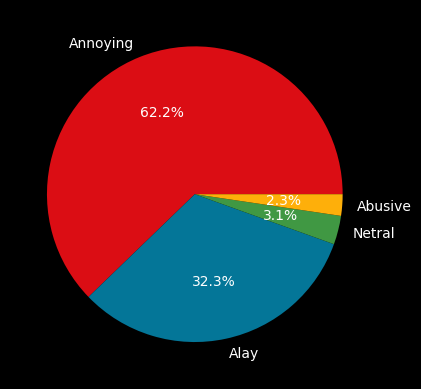

In [440]:
import matplotlib.pyplot as plt

colors = ['#db0d14', '#047698', '#409843', '#feaf0a']

count = df['Type'].value_counts()
fig = plt.figure(facecolor='black')
ax = fig.add_subplot(111)
ax.pie(count, labels=count.index, colors=colors, autopct='%1.1f%%', textprops={'color': 'white'})

plt.show()


In [ ]:
db_tweet_content = "SELECT count(type) FROM tweet_alay where"
df = pd.read_sql_query(db_tweet_content, connection)
df

([<matplotlib.patches.Wedge at 0x25bca0d8370>,
 [Text(-0.41229973719603424, 1.0198082793878864, 'Annoying'),
  Text(0.23115785933827449, -1.0754376058452424, 'Alay'),
  Text(1.0668318353361965, -0.2680854996324913, 'Netral'),
  Text(1.0970127138490253, -0.0810129968190073, 'Abusive')])

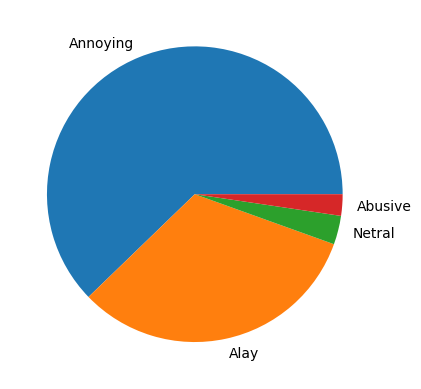

In [222]:
plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index)

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah karakter (total_char).

Berdasarkan gambar di bawah terlihat rata-rata panjang karakter dari data teks yang kita miliki ada pada sekitar 100-200 karakter.

In [679]:
sorted(df['total_char'])

[4,
 4,
 4,
 6,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,


(array([1.040e+03, 2.296e+03, 2.263e+03, 2.124e+03, 1.797e+03, 8.920e+02,
        6.080e+02, 6.660e+02, 1.178e+03, 2.730e+02, 1.900e+01, 9.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  4.  ,  31.85,  59.7 ,  87.55, 115.4 , 143.25, 171.1 , 198.95,
        226.8 , 254.65, 282.5 , 310.35, 338.2 , 366.05, 393.9 , 421.75,
        449.6 , 477.45, 505.3 , 533.15, 561.  ]),
 <BarContainer object of 20 artists>)

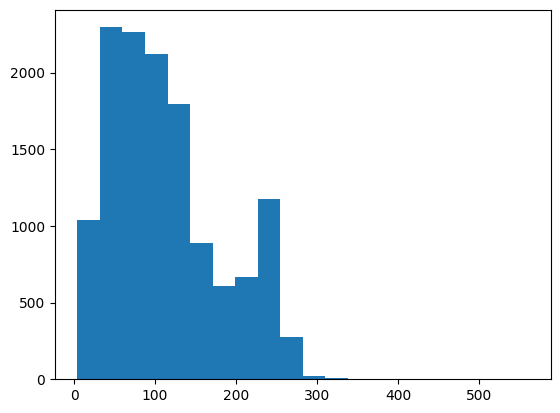

In [680]:
plt.hist(df['total_char'],bins=20)

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).

Berdasarkan gambar di bawah terlihat rata-rata panjang kata dari data teks yang kita miliki ada pada sekitar 20-40 kata.

(array([ 282., 1414., 1191., 1783., 1050., 1502.,  975., 1201.,  633.,
         659.,  515.,  293.,  502.,  309.,  444.,  162.,  169.,   48.,
          31.,    6.]),
 array([ 1.  ,  3.55,  6.1 ,  8.65, 11.2 , 13.75, 16.3 , 18.85, 21.4 ,
        23.95, 26.5 , 29.05, 31.6 , 34.15, 36.7 , 39.25, 41.8 , 44.35,
        46.9 , 49.45, 52.  ]),
 <BarContainer object of 20 artists>)

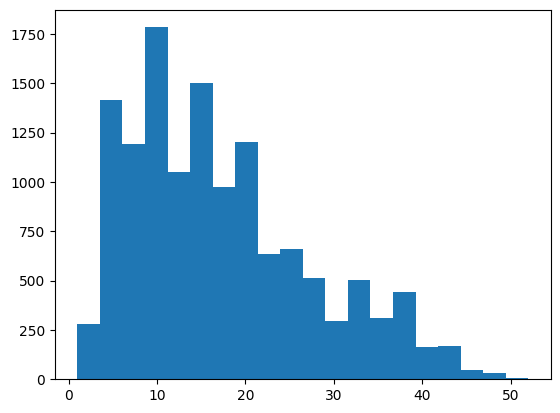

In [681]:
plt.hist(df['total_word'],bins=20)

##### Histogram & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Histogram.

Hasilnya:

*   Pada sentimen negatif, mayoritas panjang karakternya 0-200 karakter dan panjang katanya sekitar 50 kata. 
*   Pada sentimen netral, mayoritas panjang karakternya sekitar 100 karakter dan panjang katanya sekitar 25 kata.
*   Pada sentimen positif, mayoritas panjang karakternya 200-400 karakter dan panjang katanya sekitar 30-70 kata.


(array([103., 167., 204., 143., 110.,  88.,  43.,  30.,  38.,  74.]),
 array([  4. ,  29.5,  55. ,  80.5, 106. , 131.5, 157. , 182.5, 208. ,
        233.5, 259. ]),
 <BarContainer object of 10 artists>)

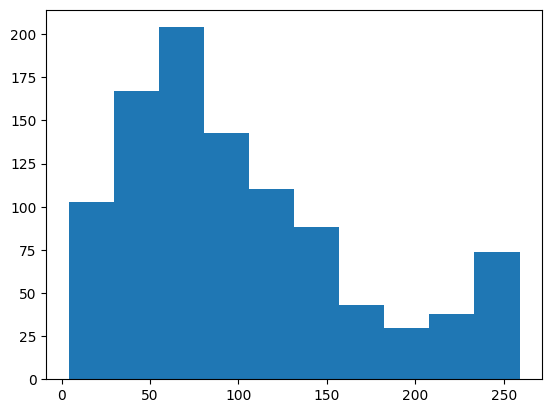

In [684]:
plt.hist(df.loc[df.Type == 'Netral']['total_char'])

(array([1.911e+03, 2.374e+03, 1.337e+03, 7.380e+02, 8.490e+02, 1.100e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10. ,  65.1, 120.2, 175.3, 230.4, 285.5, 340.6, 395.7, 450.8,
        505.9, 561. ]),
 <BarContainer object of 10 artists>)

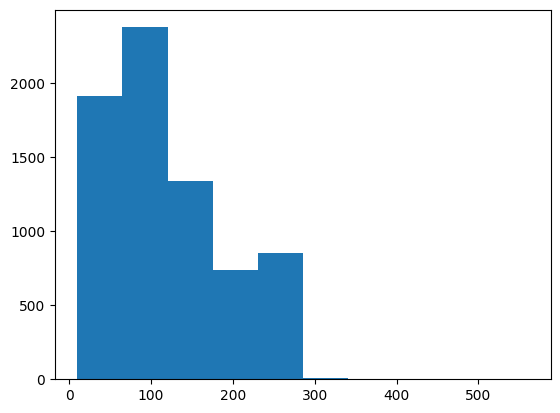

In [685]:
plt.hist(df.loc[df.Type == 'Alay']['total_char'])

(array([57., 62., 57., 52., 28., 10., 21., 32.,  1.,  1.]),
 array([  9. ,  40.7,  72.4, 104.1, 135.8, 167.5, 199.2, 230.9, 262.6,
        294.3, 326. ]),
 <BarContainer object of 10 artists>)

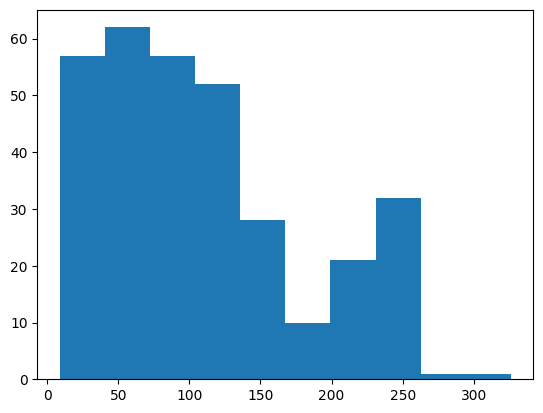

In [686]:
plt.hist(df.loc[df.Type == 'Abusive']['total_char'])

(array([ 874., 1051.,  877.,  738.,  298.,  288.,  434.,   53.,    9.,
           4.]),
 array([ 12. ,  46.7,  81.4, 116.1, 150.8, 185.5, 220.2, 254.9, 289.6,
        324.3, 359. ]),
 <BarContainer object of 10 artists>)

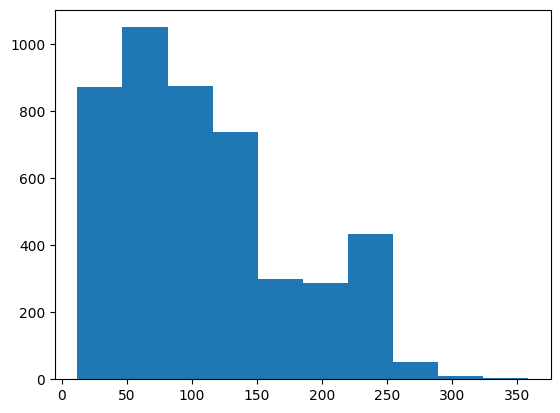

In [687]:
plt.hist(df.loc[df.Type == 'Anoying']['total_char'])

#### Wordcloud

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "dan", "dengan", "karena", "di", "sini", "tempat", "nya".

In [ ]:
pip install stylecloud

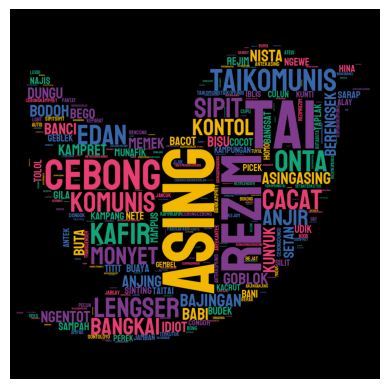

In [316]:
from PIL import Image
import stylecloud
import matplotlib.pyplot as plt
%matplotlib inline
# stylecloud.gen_stylecloud(file_path = "2009-01-20-inaugural-address.txt", icon_name= "fab fa-twitter")
df['Kalimat_Abusive'] = df['Kalimat_Abusive'].str.replace(',', '')
full_text_abusive = " ".join(df['Kalimat_Abusive'])
full_text_abusive = full_text_abusive.replace(',,', '')
stylecloud.gen_stylecloud(text=full_text_abusive, icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=1000)

# Open the image and convert it to RGBA
image = Image.open('stylecloud.png').convert('RGBA')

# Extract the color channels
r, g, b, a = image.split()

# Create a new image with a solid black background
background = Image.new('RGBA', image.size, (0, 0, 0, 255))

# Paste the color channels onto the black background
background.paste(image, mask=a)

# Set the background color to transparent
background.putalpha(0)

# Convert the image to a numpy array and show it
np_image = np.array(background)



plt.imshow(image)
plt.axis('off')
plt.show()




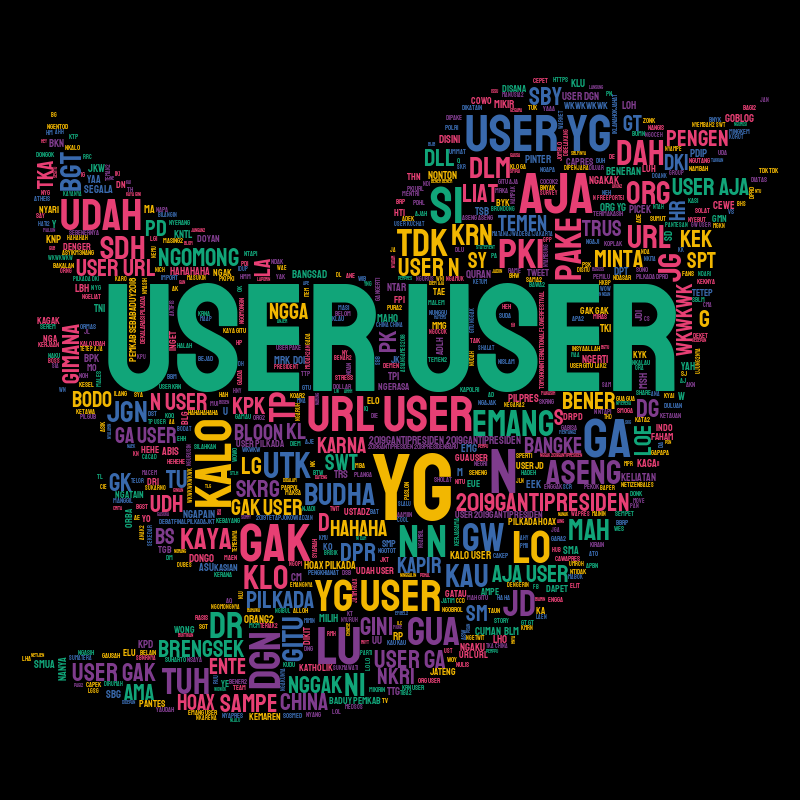

In [397]:
# df['Kalimat_Alay'] = df['Kalimat_Alay'].str.replace(',', ' ')
full_text_alay = " ".join(df['Kalimat_Alay'])
full_text_alay = full_text_alay.replace(',,', '')

from IPython.display import display, Image

stylecloud.gen_stylecloud(file_path="data.txt", icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=800)

display(Image(filename='stylecloud.png'))

# plt.imshow(plt.imread('stylecloud.png'))
# plt.axis('off')
# plt.show()




In [ ]:
pip install wordcloud

In [74]:
from wordcloud import WordCloud

In [233]:
# Visualisasi Wordcloud
df['Kalimat_Abusive'] = df['Kalimat_Abusive'].str.replace(',', '')
full_text_abusive = " ".join(df['Kalimat_Abusive'])
full_text_abusive = full_text_abusive.replace(',,', '')
wordcloud_abusive = WordCloud(width=800, height=800, background_color='white').generate(full_text_abusive)
full_text_abusive

'bego edansarap  sipit cebongkafirdongokdungu banitaplak  kampret tai ngewe bacot banci  lengser jablaypecun ontakafir ampas monyet banci  anjing noob     setan  taikomunis cebong antekasing nete sipit homongentotgay  gembelbangsat bajingan   edan kafirbejathina  anjirbego      bodohgila kampret dungu dungu    cebong nete bani iblis    bancihomo  kafir bisu setan ateis lengserbangsat  bajinganhomo cocot  asing bangkai komunis taikomunis  ngentot babi asingasingasing rezim asing   sipit nista kampang onta cebong najis transgenderanjing titit  bacotkafir lengser  bodoh    iblis goblokbanicebong cebong  tai rezim antekasingasing asing   asingasing pecun   cacat  pantat nistabodohidiotiblis tai tololrezimkomuniscebong berengsek      ngentot kafirkafir homo culun babi bangsat nista bangkai onta   bongbutabongbongterkutuktai asingasing  tololtaitololtaitololtolol kampungan asingalay   kampret memeklontekontol  banci onta bejattai rezim bego taiantektaibajingan buaya tai banci  komunis kunyuk

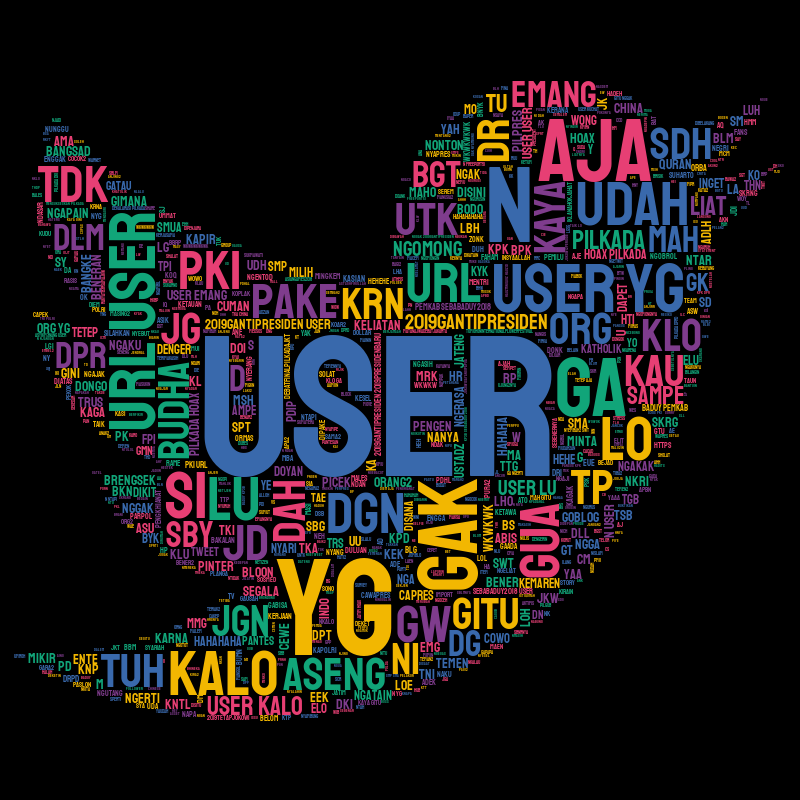

In [422]:

# df['Kalimat_Alay'] = df['Kalimat_Alay'].str.replace(',', '')
# Visualisasi Wordcloud
# full_text_alay = " ".join(df['Kalimat_Alay'])
# wordcloud_alay = WordCloud().generate(full_text_alay)
# full_text_alay
# BC = " ".join(df['Kalimat_Abusive'])
# counts = df['Kalimat_Alay'].str.split(expand=True).stack().value_counts()
# # counts.to_csv('nama_file.csv', index=True, header=['word'])
# counts
# df

join_alay = " ".join(df['Kalimat_Alay'])
join_alay = join_alay.replace("'", "")

abc = join_alay.replace(' ', ',')

abc = abc.split()

my_list_without_quotes = [s.replace("'", "") for s in abc]



list_kalimat_alay = []
for kalimat in df['Kalimat_Alay']:
    kalimat_split = kalimat.split(',')
    list_kalimat_alay.extend(kalimat_split)

list_kalimat_alay

word_count = {}
for word in list_kalimat_alay:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
sorted_word_count

from IPython.display import display, Image


list_kalimat_alay

result = []
for item in list_kalimat_alay:
    if len(result) == 0 or item != result[-1]:
        result.append(item)
# return result

result


full_text_alay22 = " ".join(result)
full_text_alay22


stylecloud.gen_stylecloud(text=full_text_alay22, icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=800)
# # stylecloud.gen_stylecloud(text="'disaat loe yg elo elo user user ngasih elu noh berfikir ninggalkan orangtuaku user user n nku diliat user user kapir udah user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user", icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=800)
display(Image(filename='stylecloud.png'))


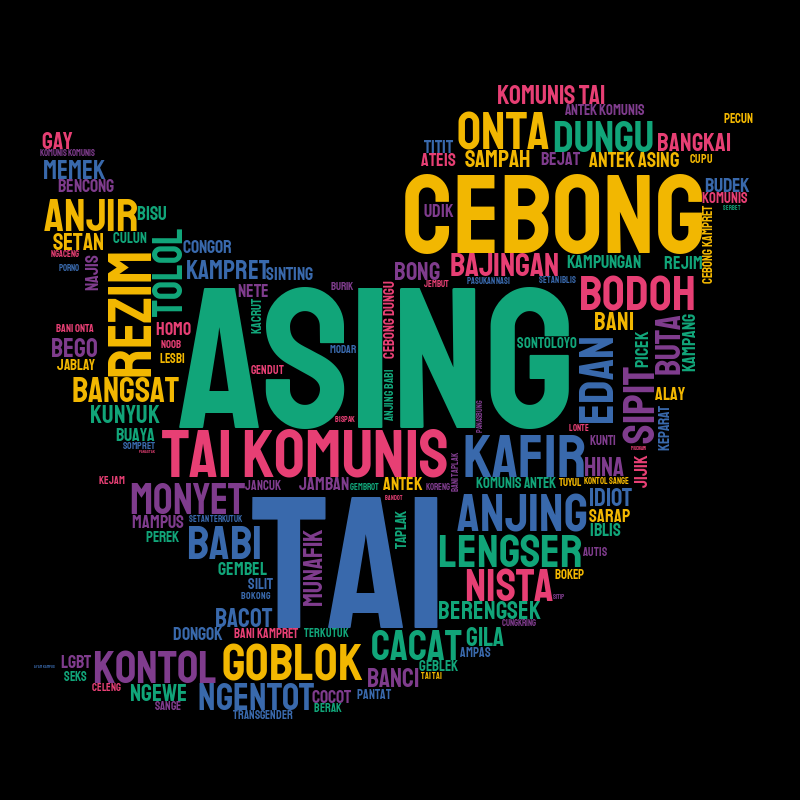

In [423]:

# df['Kalimat_Alay'] = df['Kalimat_Alay'].str.replace(',', '')
# Visualisasi Wordcloud
# full_text_alay = " ".join(df['Kalimat_Alay'])
# wordcloud_alay = WordCloud().generate(full_text_alay)
# full_text_alay
# BC = " ".join(df['Kalimat_Abusive'])
# counts = df['Kalimat_Alay'].str.split(expand=True).stack().value_counts()
# # counts.to_csv('nama_file.csv', index=True, header=['word'])
# counts
# df

join_alay = " ".join(df['Kalimat_Abusive'])
join_alay = join_alay.replace("'", "")

abc = join_alay.replace(' ', ',')

abc = abc.split()

my_list_without_quotes = [s.replace("'", "") for s in abc]



list_kalimat_alay = []
for kalimat in df['Kalimat_Abusive']:
    kalimat_split = kalimat.split(',')
    list_kalimat_alay.extend(kalimat_split)

list_kalimat_alay

word_count = {}
for word in list_kalimat_alay:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
sorted_word_count

from IPython.display import display, Image


list_kalimat_alay

result = []
for item in list_kalimat_alay:
    if len(result) == 0 or item != result[-1]:
        result.append(item)
# return result

result


full_text_alay22 = " ".join(result)
full_text_alay22


stylecloud.gen_stylecloud(text=full_text_alay22, icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=800)
# # stylecloud.gen_stylecloud(text="'disaat loe yg elo elo user user ngasih elu noh berfikir ninggalkan orangtuaku user user n nku diliat user user kapir udah user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user user", icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=800)
display(Image(filename='stylecloud.png'))


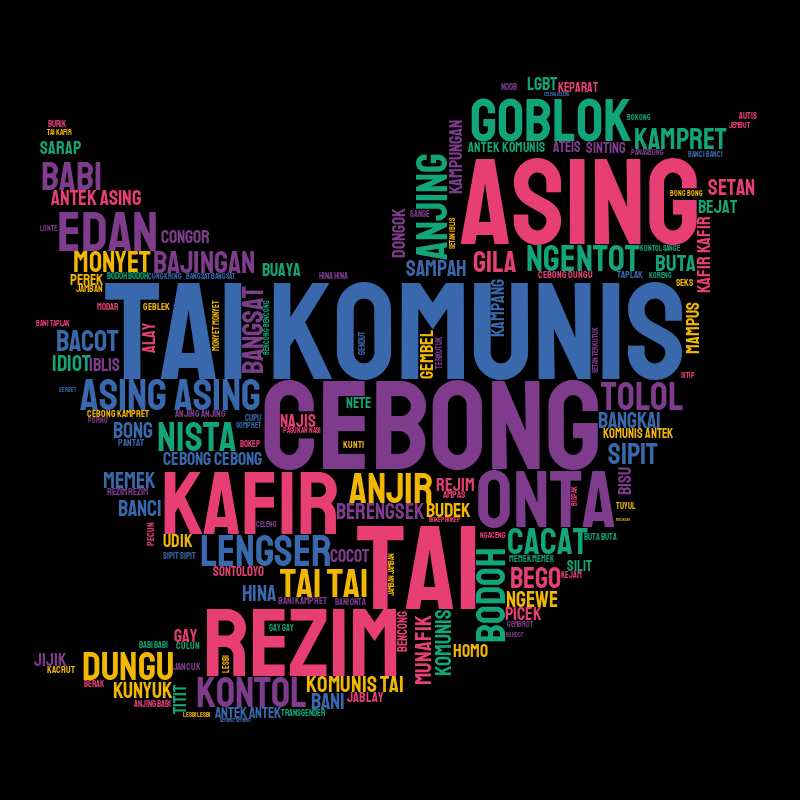

In [393]:
list_kalimat_alay = []
for kalimat in df['Kalimat_Abusive']:
    kalimat_split = kalimat.split(',')
    list_kalimat_alay.extend(kalimat_split)

list_kalimat_alay

text = ' '.join(list_kalimat_alay)

from IPython.display import display, Image


stylecloud.gen_stylecloud(text, icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=800)

display(Image(filename='stylecloud.png'))

# plt.imshow(plt.imread('stylecloud.png'))
# plt.axis('off')
# plt.show()

# counts = df['Kalimat_Alay'].str.split(expand=True).stack().value_counts()
# counts = df['Kalimat_Alay']
# counts.to_csv('nama_file.csv', index=True, header=['word'])
# counts.head()
# counts



TypeError: Image data of dtype <U113 cannot be converted to float

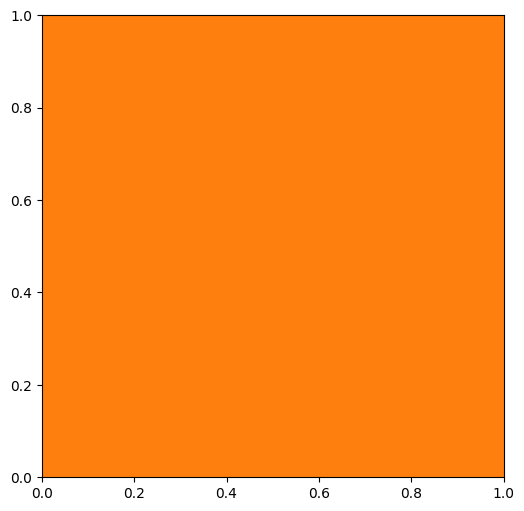

In [382]:
plt.figure(figsize=(8, 6)) # mengatur ukuran gambar menjadi 8 x 6 inchi
plt.imshow(wordcloud_abusive, interpolation='bilinear')
plt.axis("off")
plt.show()

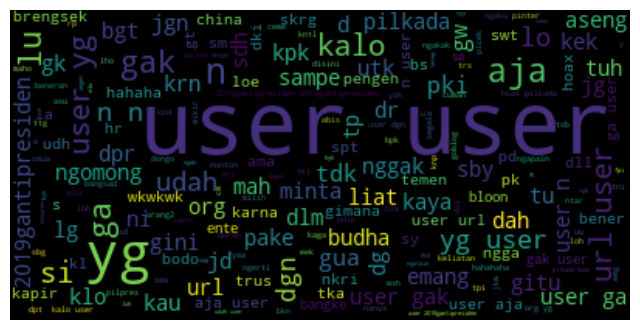

In [288]:
plt.close() 
plt.figure(figsize=(8, 6)) # mengatur ukuran gambar menjadi 8 x 6 inchi
plt.imshow(wordcloud_alay, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Wordcloud & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Worcloud.

Hasilnya:

*   Pada sentimen negatif, kata yang sering muncul adalah "nya", "yang", dan "dan". 
*   Pada sentimen netral, kata yang sering muncul adalah "dan", "yang", "di", "untuk", dan "dengan".
*   Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

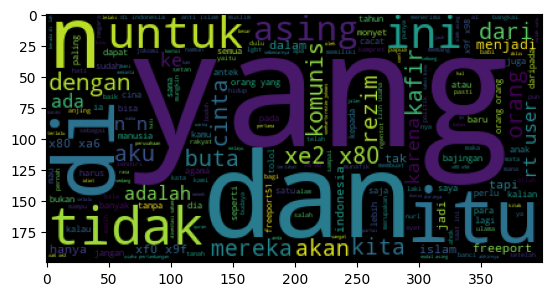

In [79]:
# Visualisasi Wordcloud sentiment negatif
full_text = " ".join(df.loc[df.Type == 'Abusive']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

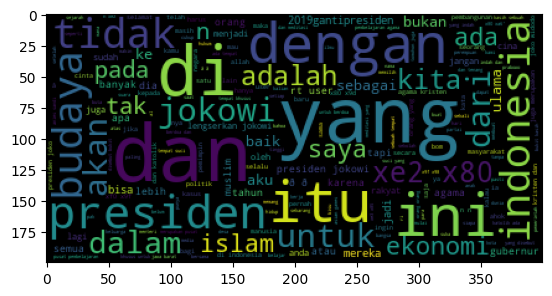

In [688]:
# Visualisasi Wordcloud sentiment neutral

full_text = " ".join(df.loc[df.Type == 'Netral']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

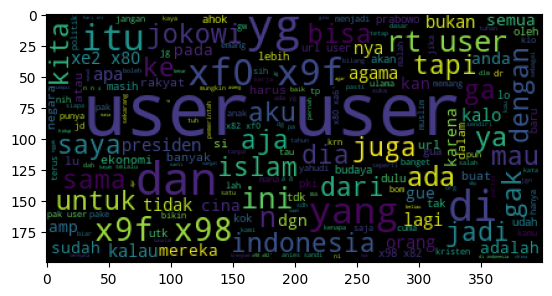

In [690]:
# Visualisasi Wordcloud sentiment positif
full_text = " ".join(df.loc[df.Type == 'Alay']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

# Analisa Korelasi Kata 'Enak' dengan label positive

In [663]:
df['apakah_ada_kata_enak'] = df['tweet'].apply(lambda x: 1 if "saya" in x else 0)

In [ ]:
df['is_label_positive'] = df['label'].apply(lambda x: 1 if x == "positive" else 0)

In [ ]:
df[['apakah_ada_kata_enak', 'is_label_positive']].corr()

In [664]:
df[['tweet']]

,tweet
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'
1,rt user: user siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'
2,"41. kadang aku berfikir, kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali-kali. kadang aku merasa tuhan itu ninggalkan aku sendirian. ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi kristen. ketika aku anak ter"
3,user user aku itu aku\n\nku tau matamu sipit tapi diliat dari mana itu aku'
4,user user kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'
...,...
13164,user jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng'
13165,user kasur mana enak kunyuk'
13166,user hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa'
13167,user user user user bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut revolusi jiwa'


## Bivariate Analysis

### Descriptive Statistic

Untuk melakukan Bivariate Analysis kita bisa mengkombinasikan pendekatan statistik dan visualisasi sama seperti Univariate Analysis.

#### Pearson Correlation
Pearson Correlation mengukur linear dependence antara 2 variabel X dan Y.
Hasilnya berupa angka diantara -1 dan 1, dimana:
- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.

Pada hasil di bawah, antara "total_word" dan "total_char" memiliki korelasi positif karena mendekati nilai 1:



*   "total_world" -> "total_char": 0.99
*   "total_char" -> "total_world": 0.99



In [80]:
df[['Total_KA','Total_A']].corr()

,Total_KA,Total_A
Total_KA,1.000000,0.085448
Total_A,0.085448,1.000000


### Visualization

#### Scatter

Angka korelasi positif sebelumnya terkonfirmasi dari visualisasi scatter di bawah. Terlihat pola yang dihasilkan linier dari pojok kiri bawah ke pojok kanan atas.

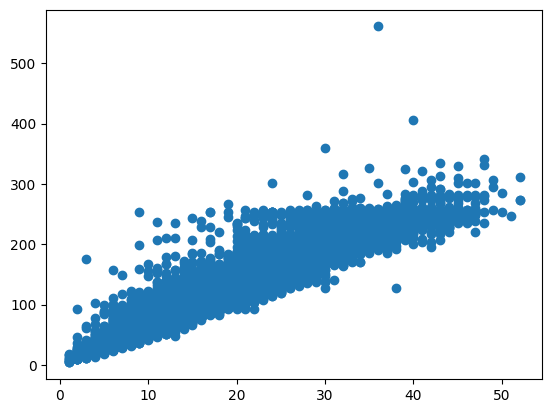

In [693]:
plt.scatter(x=df['total_word'], y=df['total_char'])

#### Bar

##### Total Word + Label

Kita bisa melihat kombinasi visualisasi antara total_word dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki kata yang paling panjang

<BarContainer object of 52 artists>

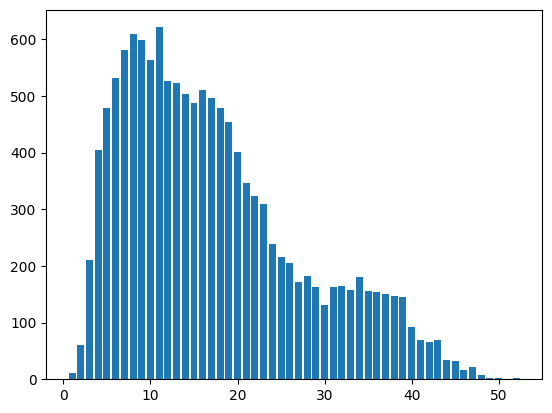

In [694]:
plt.bar(df['total_word'].value_counts().index, df['total_word'].value_counts())

##### Total Char + Label

Kita bisa melihat kombinasi visualisasi antara total_char dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki karakter yang paling panjang

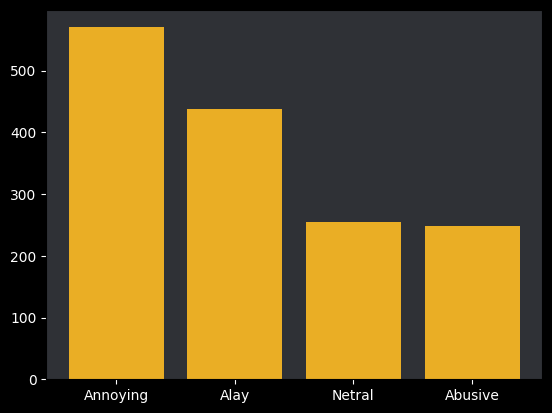

In [512]:
import matplotlib.pyplot as plt

plt.figure(facecolor='black')
plt.bar(df['Type'], df['total_char'], color='#eaae25', label='Total Karakter')
plt.tick_params(axis='x', colors='white')  # mengubah warna tulisan disamping kiri
plt.tick_params(axis='y', colors='white')  # mengubah warna tulisan di bawah
plt.gca().set_facecolor('#2f3136')  # warna dark slate grey
plt.show()


# Conclusion

Berdasarkan analisis yang sudah kita lakukan, ada beberapa insight yang bisa kita ambil:

*   Berdasarkan Univariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan data yang kita olah memiliki outlier namun tidak terlalu signifikan
  *  Dalam visualisasi menunjukkan:
      *  Total karakter dan total kata memiliki panjang 100-200 karakter dan 24-40 kata.
      *  Sentimen terbanyak adalah sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.
      *  Total karakter dan kata yang paling banyak adalah sentimen positif yakni 200-400 karakter dan 30-70 kata.
      *  Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

*   Berdasarkan Bivariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan variabel total karakter dan total kata memiliki korelasi positif. 
  *  Dalam visualisasi menunjukkan:
      *  Variabel total karakter dan total kata terkonfirmasi memiliki korelasi positif
      *  Total karakter dan kata yang paling banyak adalah sentimen positif.